In [1]:
#To supress Future Warning of Pandas
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15.0
import seaborn as sns

In [2]:
df = pd.read_csv("../Finlatics/DsResearch/Banking/banking_data.csv")

# Data Assessment

## Summary
The dataset details phone call marketing campaigns by a Portuguese bank for promoting term deposits. It aims to predict client subscription to these deposits, emphasizing the efficiency of telephonic outreach despite the costs. This focus on optimizing marketing efforts makes the dataset valuable for strategic planning in banking.

## Column Descriptions
- **`age`**: This column represents the age of the bank client. It's a numeric variable indicating the age in years.
- **`job`**: This column indicates the type of job the client has. It's a categorical variable with options such as "admin.", "unknown", "unemployed", "management", etc.
- **`marital`**: This column represents the marital status of the client. It's a categorical variable with options such as "married", "divorced", or "single".
- **`education`**: This column indicates the level of education of the client. It's a categorical variable with options such as "unknown", "secondary", "primary", or "tertiary".
- **`default`**: This column indicates whether the client has credit in default. It's a binary variable with options "yes" or "no".
- **`balance`**: This column represents the average yearly balance in euros for the client. It's a numeric variable.
- **`housing`**: This column indicates whether the client has a housing loan. It's a binary variable with options "yes" or "no".
- **`loan`**: This column indicates whether the client has a personal loan. It's a binary variable with options "yes" or "no".
- **`contact`**: This column represents the type of communication used to contact the client. It's a categorical variable with options such as "unknown", "telephone", or "cellular".
- **`day`**: This column represents the last contact day of the month. It's a numeric variable.
- **`month`**: This column represents the last contact month of the year. It's a categorical variable with options such as "jan", "feb", "mar", etc.
- **`duration`**: This column represents the duration of the last contact in seconds. It's a numeric variable.
- **`campaign`**: This column represents the number of contacts performed during this campaign and for this client. It's a numeric variable.
- **`pdays`**: This column represents the number of days that passed by after the client was last contacted from a previous campaign. It's a numeric variable where -1 means the client was not previously contacted.
- **`previous`**: This column represents the number of contacts performed before this campaign and for this client. It's a numeric variable.
- **`poutcome`**: This column represents the outcome of the previous marketing campaign. It's a categorical variable with options such as "unknown", "other", "failure", or "success".
- **`y`**: This column is the target variable and indicates whether the client has subscribed to a term deposit. It's a binary variable with options "yes" or "no".

## Issues with dataset

1. Dirty Data
   - job, marital, marital_status, education, default, housing, loan, contact, day, month, day-month, poutcome,y as assigned wrong dtype `validity`
   - marital, marital_status, education have missing values `completion`
   - replace nan in education with unknown `validity`
   - append year to day_month column `completion`
   - 5 duplicate entries `accuracy`
3. Messy Data
   - marital and marital_status represent the exact same information
   - day and month column are unecessary when day-month is present
   - rename day_month column to date once year is appended

In [3]:
df.head()

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000,45216.000000
mean,40.938186,1362.277844,15.806507,258.166202,2.763668,40.202428,0.580657
std,10.621249,3044.609674,8.322022,257.515482,3.097896,100.128248,2.303778
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.500000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df[df.duplicated()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes
45215,71,retired,divorced,divorced,primary,no,1729,no,no,cellular,17,nov,17-Nov,456,2,-1,0,unknown,yes


In [7]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [8]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [9]:
df['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [10]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary', nan], dtype=object)

In [11]:
df['education'].value_counts()

education
secondary    23204
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [12]:
df[df['marital'].isna()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44996,75,retired,NaN,NaN,secondary,no,1092,no,no,telephone,12,oct,12-Oct,250,1,431,2,failure,no
45077,20,student,NaN,NaN,secondary,no,88,no,no,telephone,21,oct,21-Oct,621,1,181,4,other,no
45209,57,blue-collar,NaN,NaN,secondary,no,668,no,no,telephone,17,nov,17-Nov,508,4,-1,0,unknown,no


In [13]:
df[df['education'].isna()]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
44957,32,management,single,single,NaN,no,3289,no,no,cellular,8,oct,8-Oct,375,2,179,2,failure,no
45137,30,management,single,single,NaN,no,297,no,no,cellular,8,nov,8-Nov,188,1,-1,0,unknown,yes
45170,19,student,single,single,NaN,no,245,no,no,telephone,10,nov,10-Nov,98,2,110,2,other,no


In [14]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df[df['balance']<0]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
25,44,admin.,married,married,secondary,no,-372,yes,no,unknown,5,may,5-May,172,1,-1,0,unknown,no
28,46,management,single,single,secondary,no,-246,yes,no,unknown,5,may,5-May,255,2,-1,0,unknown,no
36,25,blue-collar,married,married,secondary,no,-7,yes,no,unknown,5,may,5-May,365,1,-1,0,unknown,no
37,53,technician,married,married,secondary,no,-3,no,no,unknown,5,may,5-May,1666,1,-1,0,unknown,no
45,36,admin.,single,single,primary,no,-171,yes,no,unknown,5,may,5-May,242,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,single,secondary,no,-205,no,no,cellular,1,sep,1-Sep,481,1,579,1,failure,yes
44629,28,blue-collar,single,single,secondary,no,-46,yes,no,cellular,1,sep,1-Sep,199,1,92,14,success,yes
44836,33,blue-collar,married,married,primary,no,-195,no,no,unknown,20,sep,20-Sep,9,1,-1,0,unknown,no
44908,48,management,divorced,divorced,tertiary,no,-130,yes,no,cellular,29,sep,29-Sep,110,2,61,9,failure,no


In [16]:
df['balance'].sort_values()

12909     -8019
15682     -6847
38736     -4057
7413      -3372
1896      -3313
          ...  
41693     71188
43393     81204
42558     81204
26227     98417
39989    102127
Name: balance, Length: 45216, dtype: int64

In [17]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [19]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [20]:
df['duration'].value_counts()

duration
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: count, Length: 1573, dtype: int64

In [21]:
df[df['duration']<0]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y


In [22]:
df['campaign'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [23]:
df[df['pdays']<-1]

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y


In [24]:
df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [25]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [26]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

# Data Cleaning

In [27]:
df1 = df.copy()

In [28]:
#Dropping the marital_status, day, month column
df1 = df1.drop(columns=['marital_status','day','month'])
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5-May,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5-May,198,1,-1,0,unknown,no


In [29]:
#Rename day_month to date
df1 = df1.rename(columns={'day_month':'date'})
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,date,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5-May,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5-May,198,1,-1,0,unknown,no


In [30]:
#Dropping duplicate entries
df1 = df1.drop_duplicates()
df1.shape

(45211, 16)

In [31]:
#Replacing nan values of education with unknown
df1['education'] = df1['education'].fillna("unknown")
df1['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [32]:
#Appending year to the date column
df1.loc[:27728,'date'] = df1.loc[:27728,'date'] + "-2008"
df1.loc[27729:42590,'date'] = df1.loc[27729:42590,'date'] + "-2009"
df1.loc[42591:,'date'] = df1.loc[42591:,'date'] + "-2010"

In [33]:
#Correcting the data types
df1['marital'] = df1['marital'].astype('category')
df1['job'] = df1['job'].astype('category')
df1['education'] = df1['education'].astype('category')
df1['default'] = df1['default'].astype('category')
df1['housing'] = df1['housing'].astype('category')
df1['loan'] = df1['loan'].astype('category')
df1['contact'] = df1['contact'].astype('category')
df1['date'] = pd.to_datetime(df1['date'],format="%d-%b-%Y")
df1['poutcome'] = df1['poutcome'].astype('category')
df1['y'] = df1['y'].astype('category')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   age        45211 non-null  int64         
 1   job        45211 non-null  category      
 2   marital    45208 non-null  category      
 3   education  45211 non-null  category      
 4   default    45211 non-null  category      
 5   balance    45211 non-null  int64         
 6   housing    45211 non-null  category      
 7   loan       45211 non-null  category      
 8   contact    45211 non-null  category      
 9   date       45211 non-null  datetime64[ns]
 10  duration   45211 non-null  int64         
 11  campaign   45211 non-null  int64         
 12  pdays      45211 non-null  int64         
 13  previous   45211 non-null  int64         
 14  poutcome   45211 non-null  category      
 15  y          45211 non-null  category      
dtypes: category(9), datetime64[ns](1), int64(6)
m

In [34]:
df1.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,date,duration,campaign,pdays,previous,poutcome,y
20660,32,technician,single,tertiary,no,1732,no,no,cellular,2008-08-12,140,4,-1,0,unknown,no
22905,49,management,married,secondary,no,338,no,no,cellular,2008-08-25,941,3,-1,0,unknown,no
41523,62,retired,married,secondary,no,495,no,yes,telephone,2009-09-09,494,2,-1,0,unknown,no
27773,48,services,married,secondary,no,651,no,yes,cellular,2009-01-28,228,1,196,2,failure,no
44959,36,technician,single,secondary,no,966,no,no,cellular,2010-10-08,135,2,91,13,failure,no


# Exploratory Data Analysis

## What is the distribution of age among the clients?
**`Conclusion:`**

- Minimum age is 18 yrs and maximum age is 95 yrs

- A significant number of clients are in their late 30s to early 40s

- Mean age is approximately 41 yrs

- Median age is 39 yrs

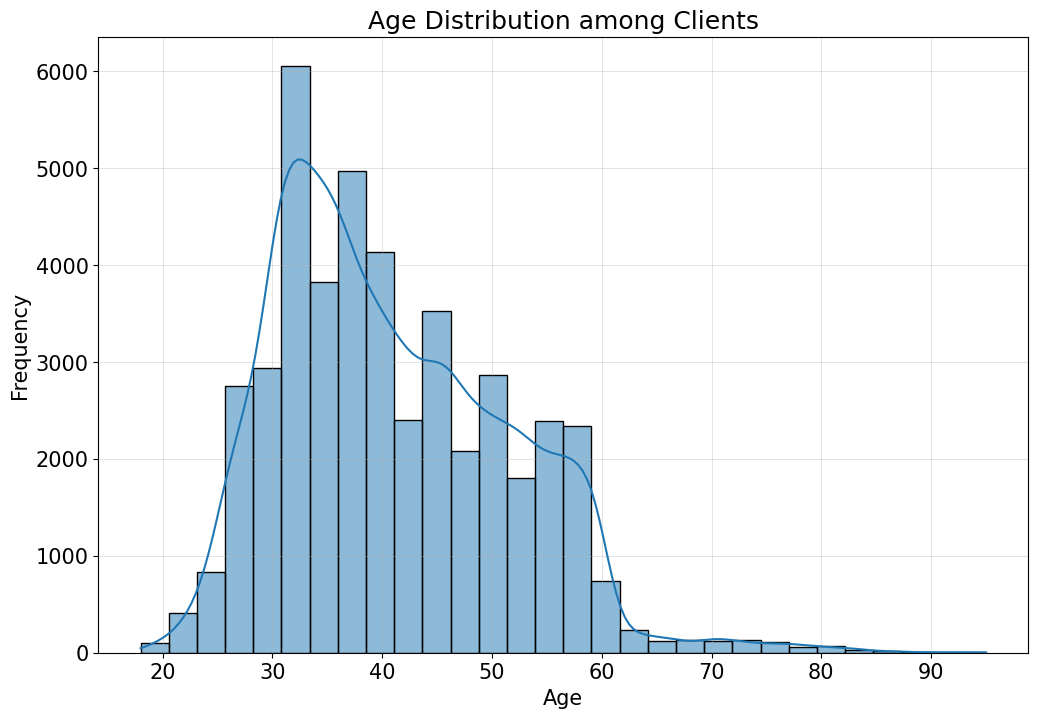

In [35]:
plt.figure(figsize=(12,8))
sns.histplot(df1['age'],bins=30,kde=True)
plt.title('Age Distribution among Clients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True,linewidth=0.5, alpha=0.5)
plt.show()

In [36]:
df1['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

## How does the job type vary among the clients?
**`Conclusion:`**

- blue-collar workers, management, and technicians are the top three job categories among clients

- Students represent the smallest client group

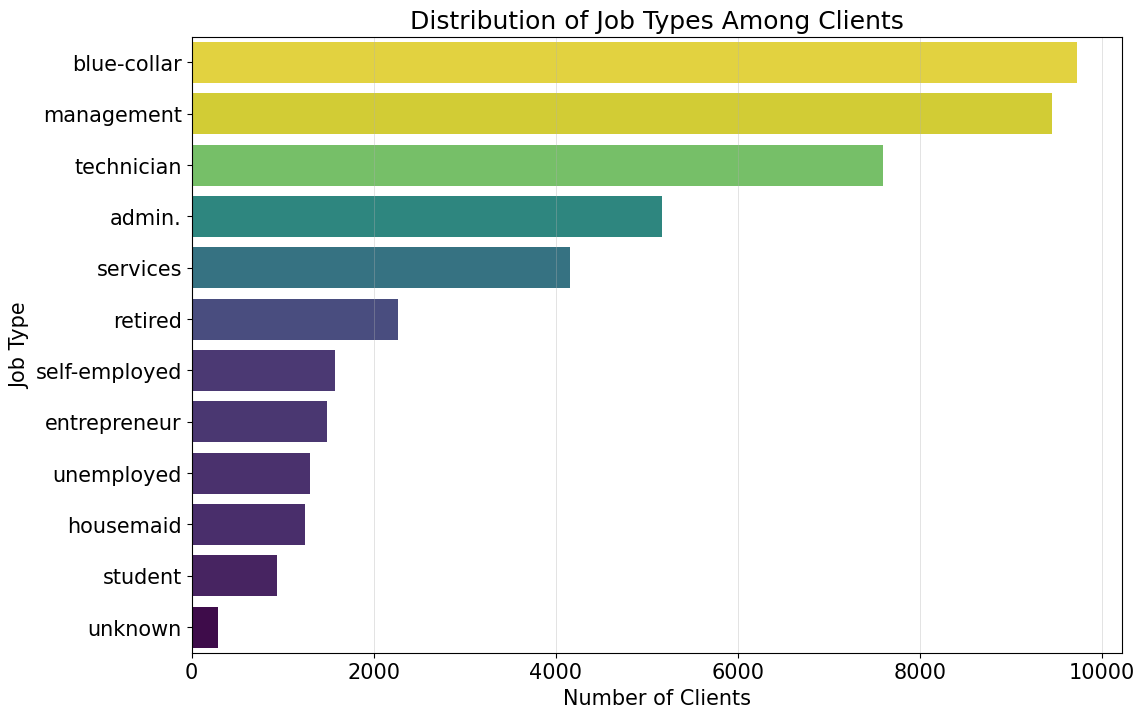

In [37]:
job_df = df1['job'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='job',data=job_df,hue='count',legend=False, palette="viridis",order=job_df['job'])
plt.title('Distribution of Job Types Among Clients')
plt.xlabel('Number of Clients')
plt.ylabel('Job Type')
plt.grid(axis='x',linewidth=0.5, alpha=0.5)
plt.show()

## What is the marital status distribution of the clients?
**`Conclusion:`**

- Around 60% clients are married, 10% are divorced, 30% are single

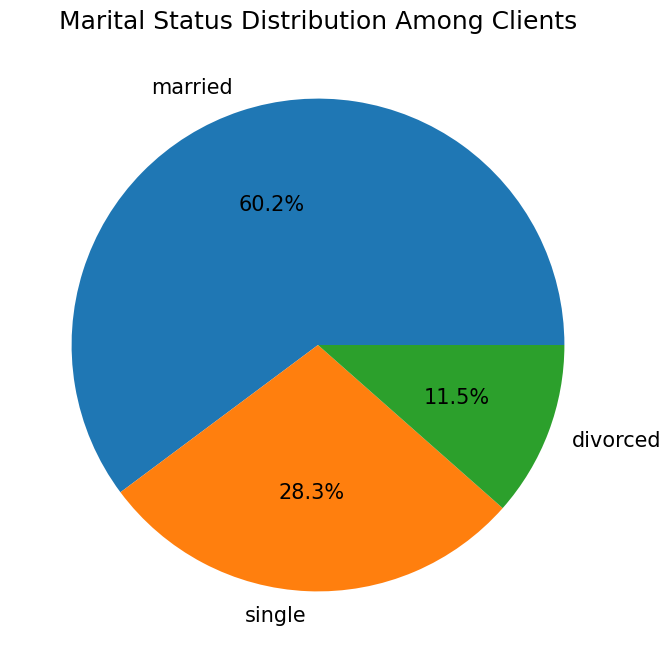

In [38]:
marital_df = df1['marital'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(marital_df['count'],labels=marital_df['marital'], autopct='%0.1f%%')
plt.title('Marital Status Distribution Among Clients')
plt.show()

## What is the level of education among the clients?
**`Conclusion:`**

- More than 50% clients have completed secondary education

- Approx. 30% clients have completed tertiary education and 15% have completed primary education

- Education level of a few clients is unknown

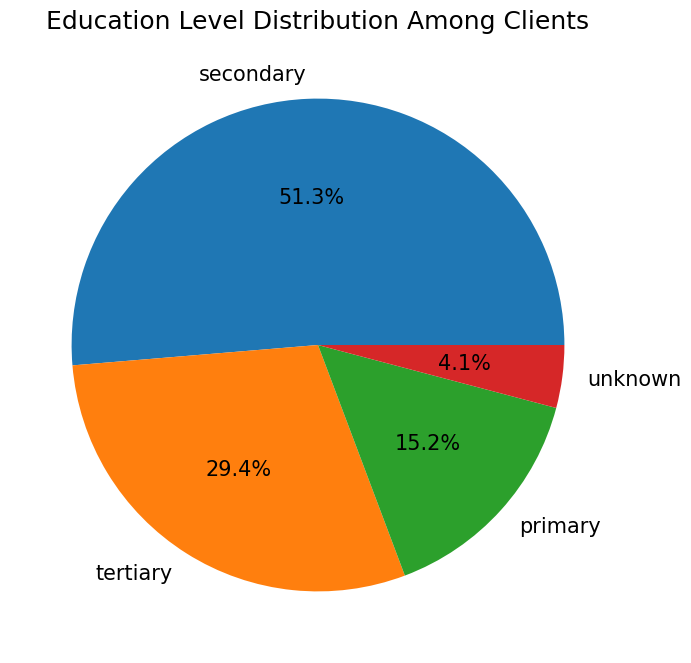

In [39]:
edu_df = df1['education'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(edu_df['count'],labels=edu_df['education'], autopct='%0.1f%%')
plt.title("Education Level Distribution Among Clients")
plt.show()

## What proportion of clients have credit in default?
**`Conclusion:`**

- Approximately 98.2% of clients do not have credit in default, while about 1.8% of clients do have credit in default

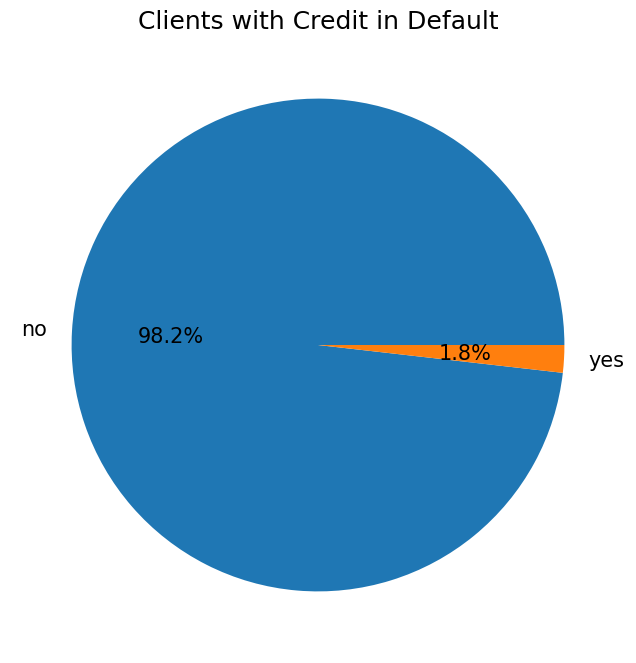

In [40]:
def_df = df1['default'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(def_df['count'],labels=def_df['default'], autopct='%0.1f%%')
plt.title("Clients with Credit in Default")
plt.show()

## What is the distribution of average yearly balance among the clients?
**`Conclusion:`**

- Mean Average Balance: Approximately €1,362

- Median Average Balance: Approximately €448.5

- Minimum Balance: -€8,019, suggesting some clients have an overdrawn account

- Maximum Balance: €1,02,127, showing that some clients have very high balances

- The distribution of balances is highly positively skewed, with a majority of clients having relatively low balances, and a small number of clients having very high balances

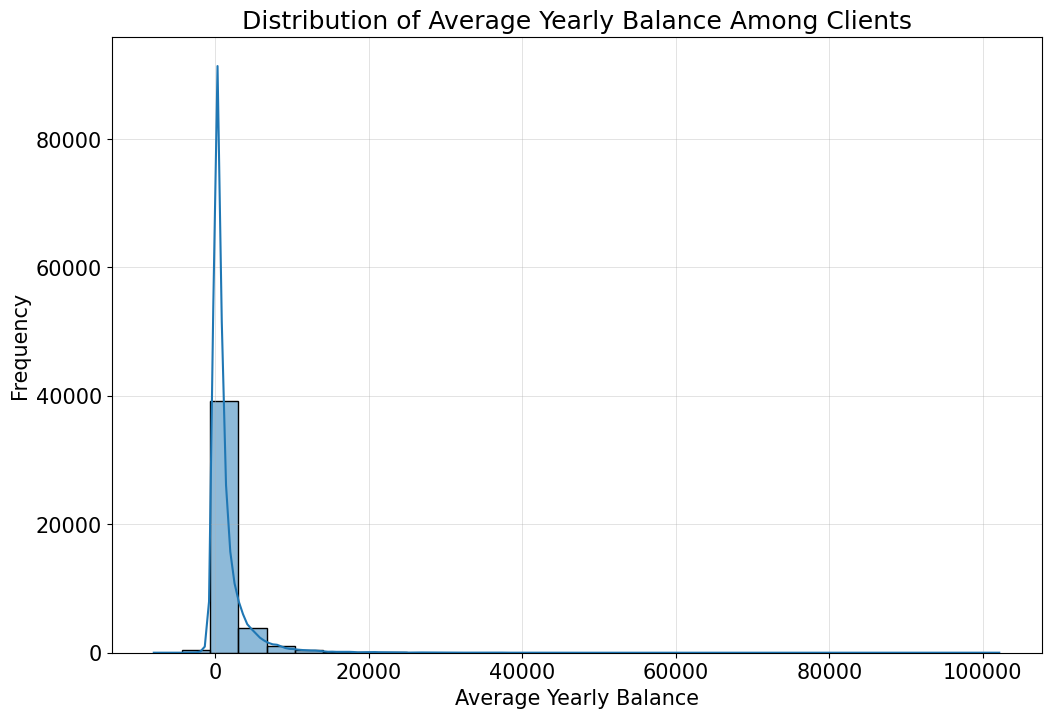

In [41]:
plt.figure(figsize=(12,8))
sns.histplot(df1['balance'],bins=30,kde=True)
plt.title('Distribution of Average Yearly Balance Among Clients')
plt.xlabel('Average Yearly Balance')
plt.ylabel('Frequency')
plt.grid(True,linewidth=0.5, alpha=0.5)
plt.show()

In [42]:
df['balance'].describe()

count     45216.000000
mean       1362.277844
std        3044.609674
min       -8019.000000
25%          72.000000
50%         448.500000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

## How many clients have housing loans?
**`Conclusion:`**

- 25129 clients have housing loans(55.6%)

- 20081 clients do not have housing loans(44.4%)

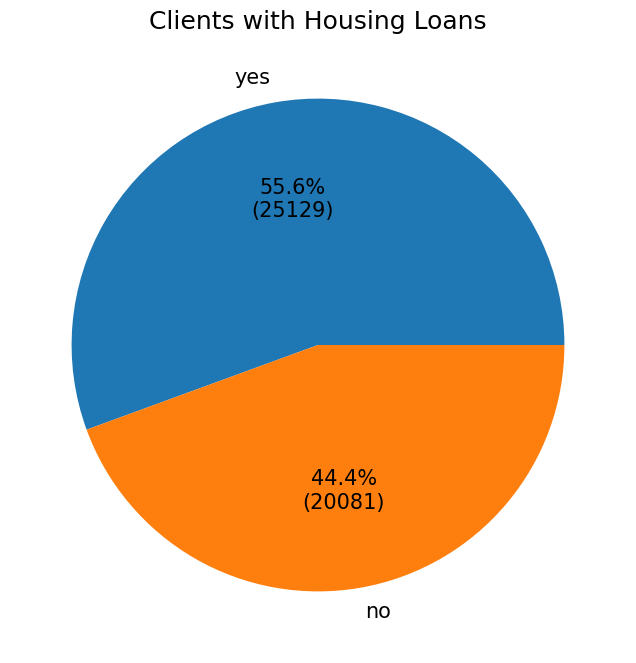

In [43]:
house_df = df1['housing'].value_counts().reset_index().sort_values(by='count', ascending=False)
#Function to display values in pie chart
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
plt.figure(figsize=(12, 8))
plt.pie(house_df['count'],labels=house_df['housing'], autopct=lambda pct: func(pct, house_df['count']))
plt.title('Clients with Housing Loans')
plt.show()

## How many clients have personal loans?
**`Conclusion:`**

- 7244 clients have personal loans(16%)

- 37967 clients do not have personal loans(84%)

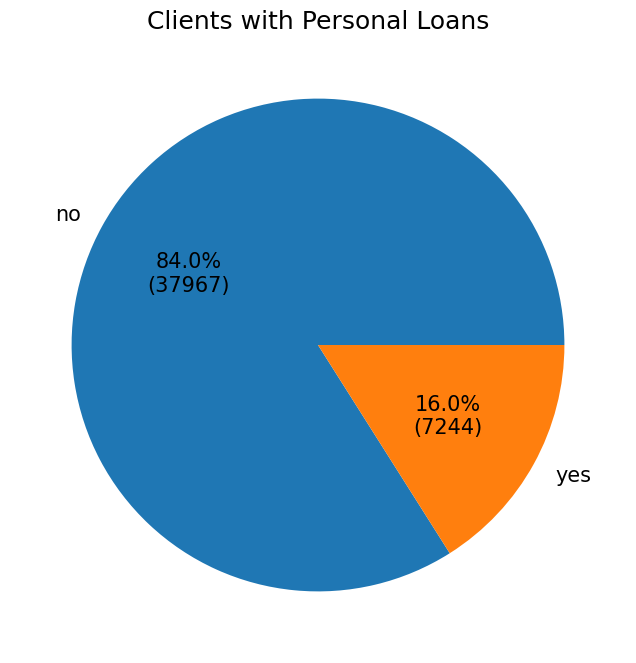

In [44]:
personal_df = df1['loan'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(personal_df['count'],labels=personal_df['loan'], autopct=lambda pct: func(pct, house_df['count']))
plt.title('Clients with Personal Loans')
plt.show()

## What are the communication types used for contacting clients during the campaign?
**`Conclusion:`**

- Cellular phones were the most frequently used communication method, followed by instances where the communication type was not specified ('unknown'), and telephone calls were the least used method

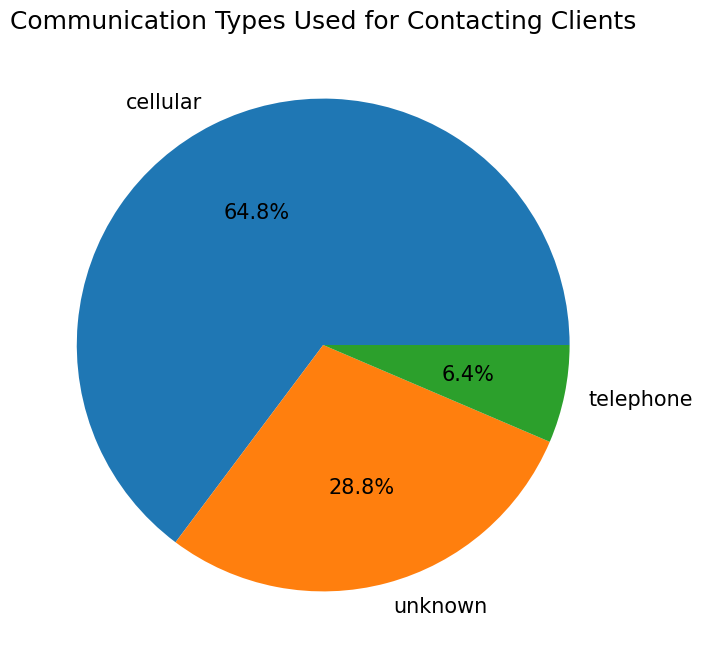

In [45]:
comm_df = df1['contact'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(comm_df['count'],labels=comm_df['contact'], autopct='%1.1f%%')
plt.title('Communication Types Used for Contacting Clients')
plt.show()

## What is the distribution of the last contact day of the month?
**`Conclusion:`**

- The 20th of the month stands out as having the highest number of contacts, followed by the 18th and the 21st

- Month start and end have relatively lower number of contacts

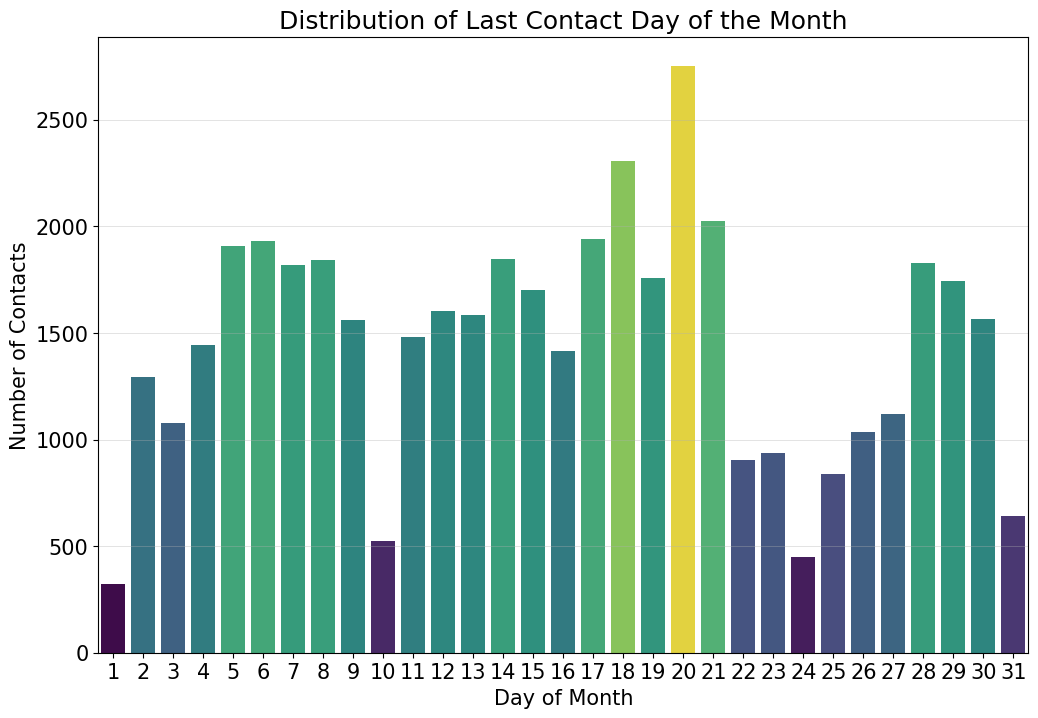

In [46]:
date_df = df1['date'].apply(lambda x : x.day).value_counts().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='count',data=date_df,hue='count',palette=sns.color_palette("viridis", as_cmap=True),legend=False)
plt.title('Distribution of Last Contact Day of the Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Contacts')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

## How does the last contact month vary among the clients?
**`Conclusion:`**

- May was the month with the highest number of client contacts during the campaign, followed by July and August

- Least number of client contacts during the campaign were in December

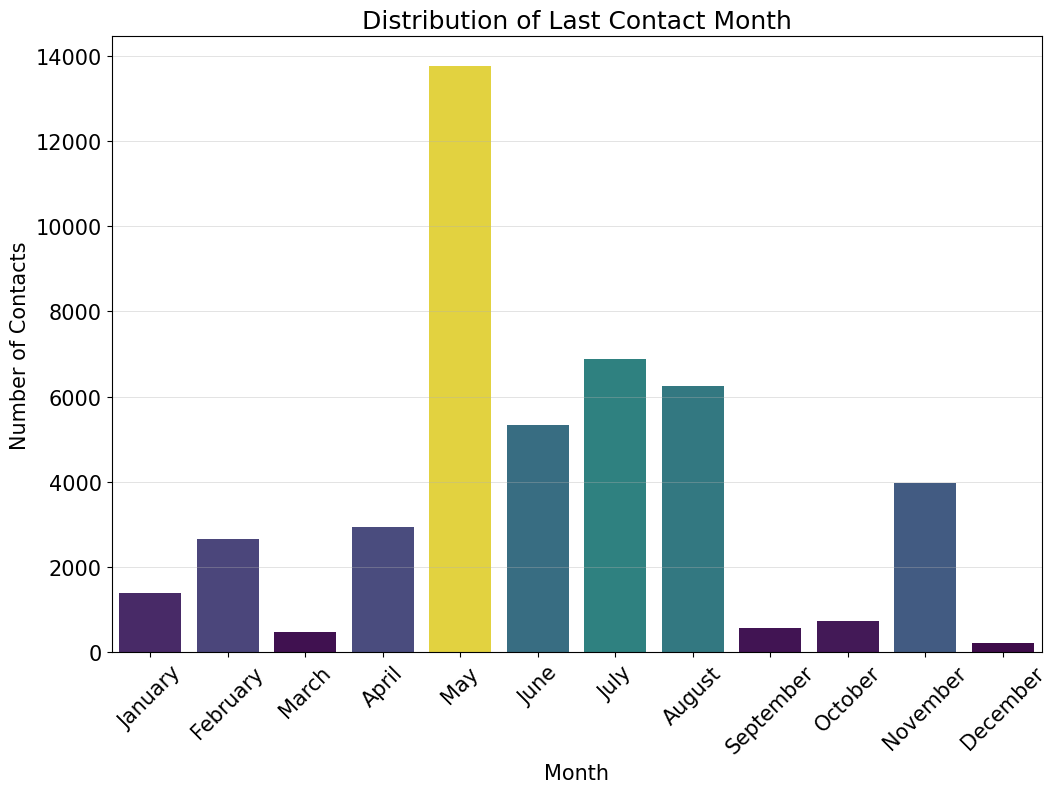

In [47]:
date_df = df1['date'].dt.month_name().value_counts()
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
date_df = date_df.reindex(order,axis=0).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='date', y='count',data=date_df,hue='count',legend=False,palette=sns.color_palette("viridis", as_cmap=True))
plt.title('Distribution of Last Contact Month')
plt.xlabel('Month')
plt.ylabel('Number of Contacts')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.show()

## What is the distribution of the duration of the last contact?
**`Conclusion:`**

- Mean duration of last contact is approximately 258 seconds

- Median duration of last contact is 180 seconds

- Minimum duration is 0 seconds while maximum duration is 4918 seconds

- The distribution of last contact duration is highly positively skewed, with a majority of clients having relatively low duration, and a small number of clients having very high duration

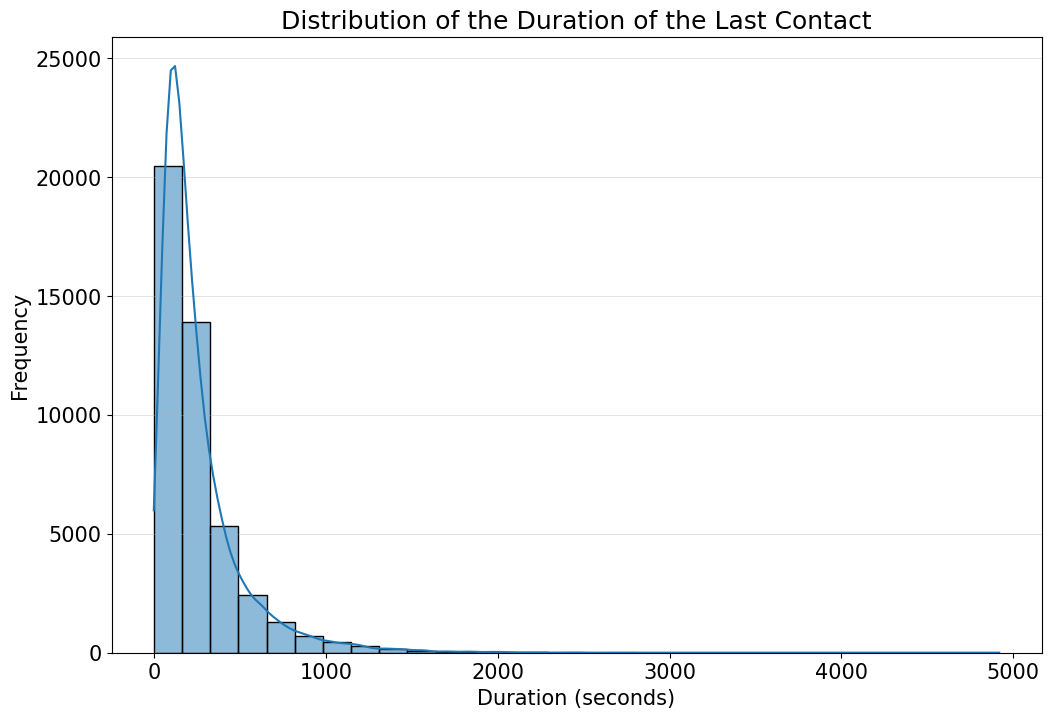

In [48]:
plt.figure(figsize=(12, 8))
sns.histplot(df1['duration'], bins=30, kde=True)
plt.title('Distribution of the Duration of the Last Contact')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

In [49]:
df1['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

## How many contacts were performed during the campaign for each client?
**`Conclusion:`**

- Mean contacts performed for a client is approximately 2.8

- Median contacts performed for a client is 2

- Minimum contacts is 1  while maximum contacts are 63

- The distribution of contacts performed is highly positively skewed, with a majority of clients having relatively low contacts, and a small number of clients having very high contacts

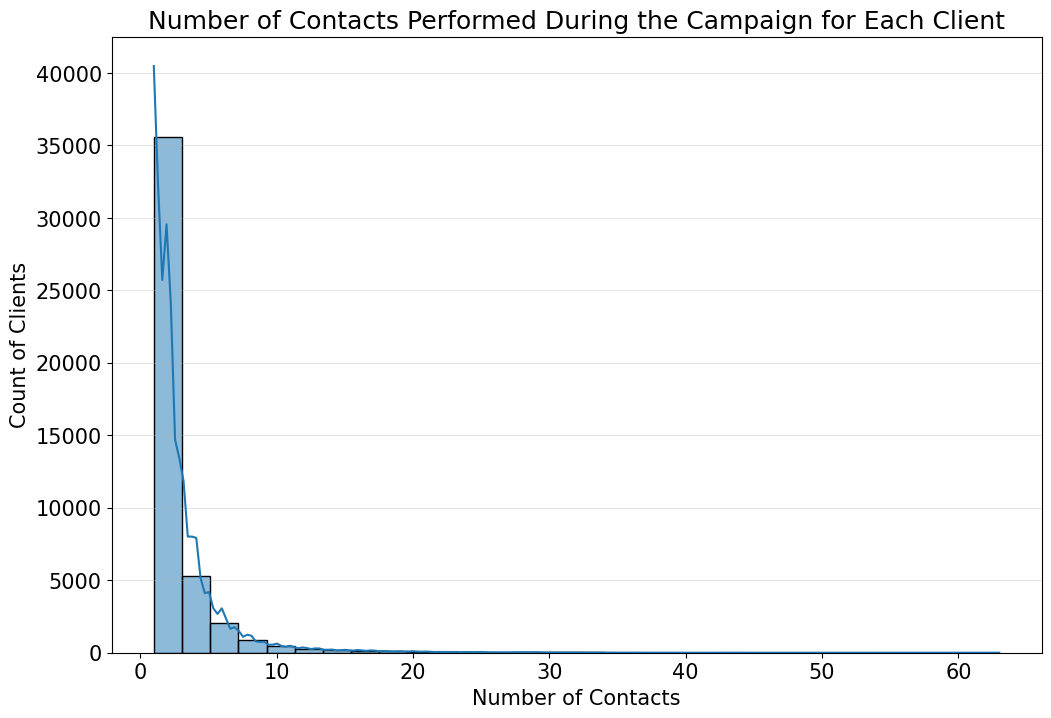

In [50]:
plt.figure(figsize=(12, 8))
sns.histplot(df1['campaign'], bins=30, kde=True)
plt.title('Number of Contacts Performed During the Campaign for Each Client')
plt.xlabel('Number of Contacts')
plt.ylabel('Count of Clients')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

In [51]:
df1['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

## What is the distribution of the number of days passed since the client was last contacted from a previous campaign?
**`Conclusion:`**

- There is an extremely high peak at -1, which implies that the majority of clients had not been contacted before the current campaign

- Mean days passed since last contact are approximately 40

- Median days passed since last contact are -1

- Minimum days passed since last contact are -1 while maximum days passed are 871

- Peaks occur roughly every 50 to 100 days, indicating systematic follow-up intervals in the campaign strategy

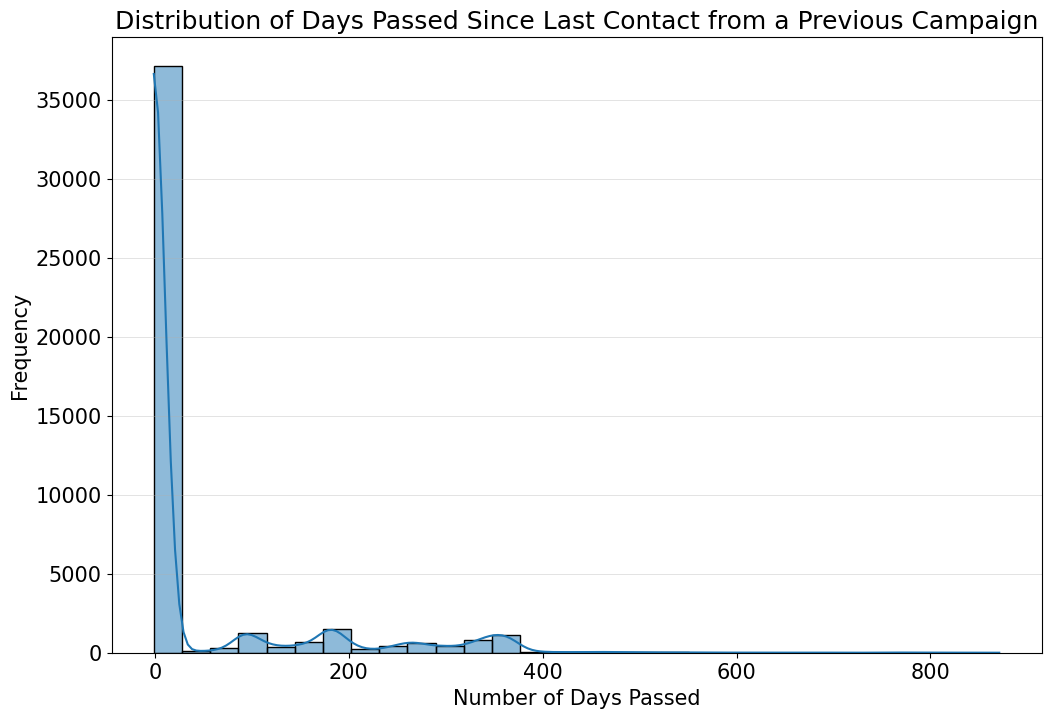

In [52]:
plt.figure(figsize=(12, 8))
sns.histplot(df1['pdays'], bins=30, kde=True)
plt.title('Distribution of Days Passed Since Last Contact from a Previous Campaign')
plt.xlabel('Number of Days Passed')
plt.ylabel('Frequency')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

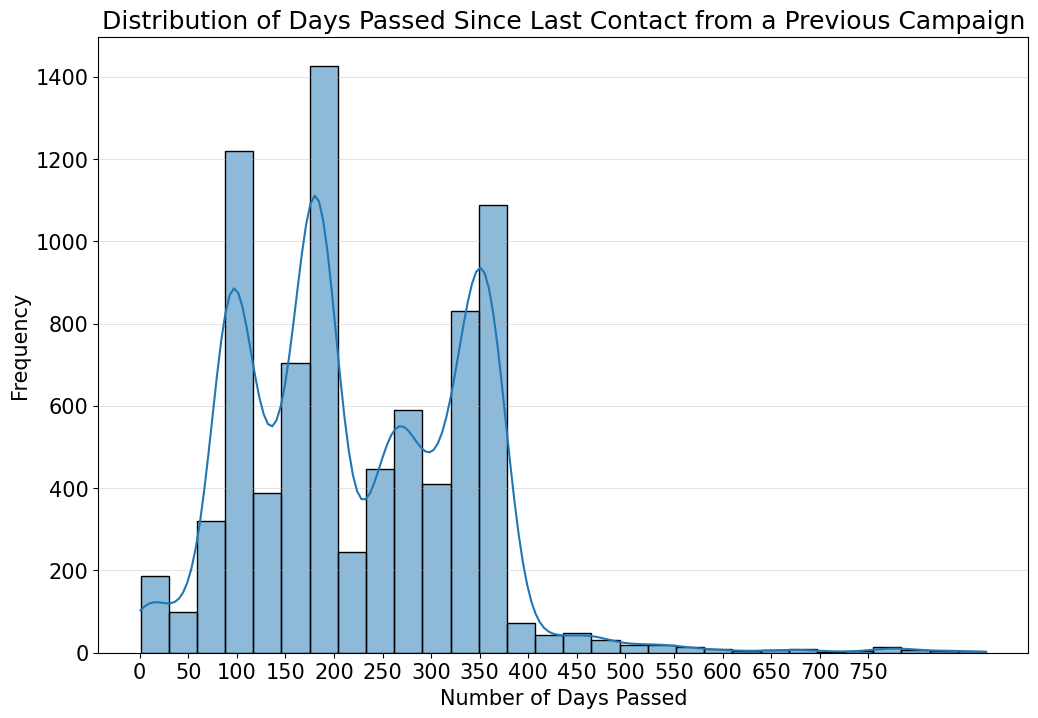

In [53]:
plt.figure(figsize=(12, 8))
sns.histplot(df1[df1['pdays']!=-1]['pdays'], bins=30, kde=True)
plt.title('Distribution of Days Passed Since Last Contact from a Previous Campaign')
plt.xlabel('Number of Days Passed')
plt.ylabel('Frequency')
plt.xticks(np.arange(0,800,50))
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

In [54]:
df1['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

## How many contacts were performed before the current campaign for each client?
**`Conclusion:`**

- A dominant peak at zero, signifying that a significant portion of clients had no prior contact before the current campaign

- Mean contacts performed before the current campaign are approximately 0.58

- Median contacts performed before the current campaign are 0

- Minimum contacts performed before the current campaign are 0 while maximum contacts performed are 275 for a client

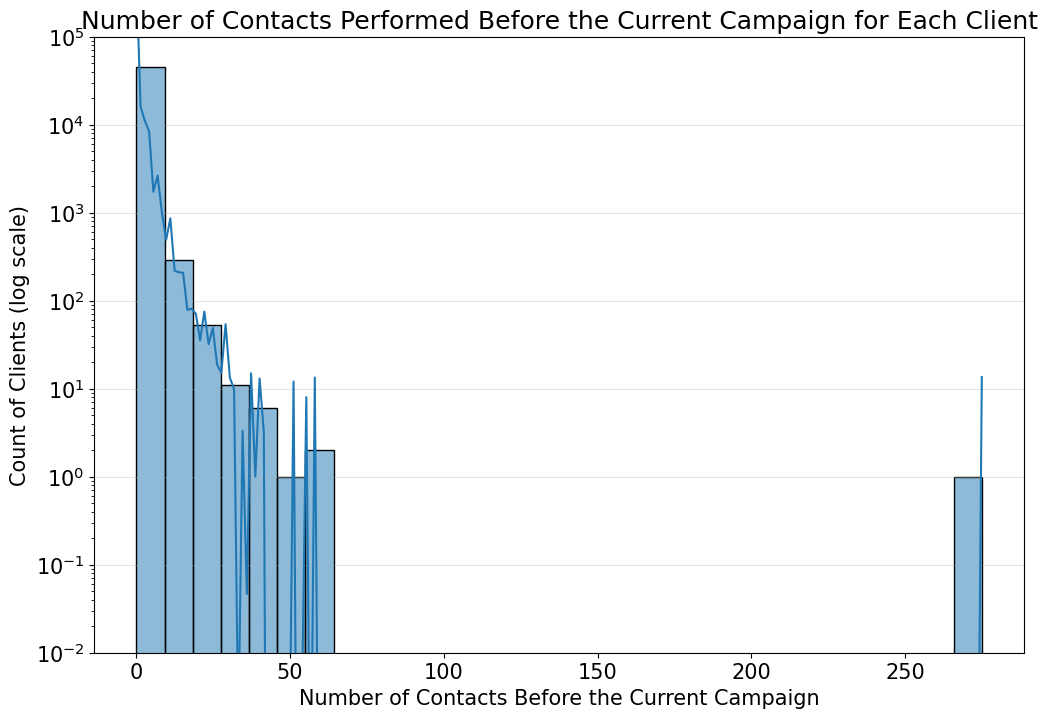

In [55]:
plt.figure(figsize=(12, 8))
sns.histplot(df1['previous'], bins=30, kde=True)
plt.title('Number of Contacts Performed Before the Current Campaign for Each Client')
plt.xlabel('Number of Contacts Before the Current Campaign')
plt.ylabel('Count of Clients (log scale)')
plt.yscale('log')
plt.ylim(bottom=0.01,top=1e5)
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

In [56]:
df1['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

## What were the outcomes of the previous marketing campaigns?
**`Conclusion:`**

- Majority of outcomes from previous marketing campaigns are unknown, making up 81.7% of the cases

- Failures constitute 10.8%, successes are 3.3%, and other outcomes account for 4.1%

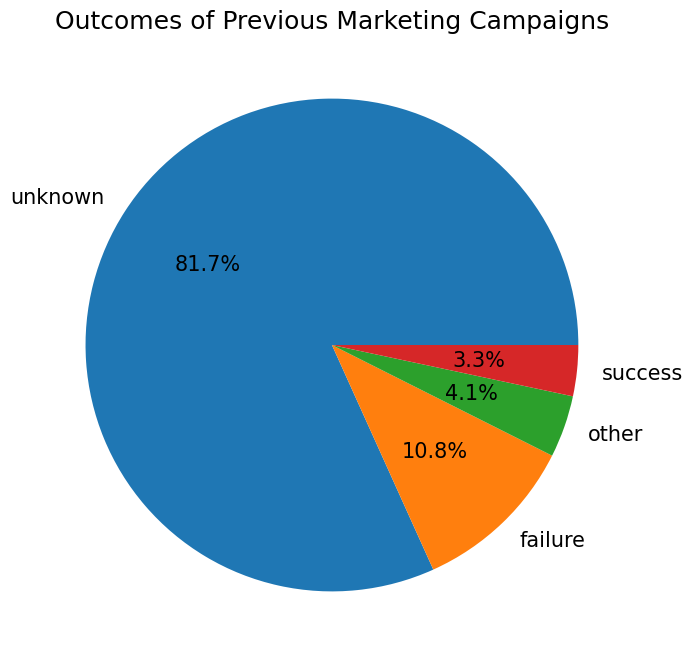

In [57]:
pout_df = df1['poutcome'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(pout_df['count'],labels=pout_df['poutcome'], autopct='%1.1f%%')
plt.title('Outcomes of Previous Marketing Campaigns')
plt.show()

## What is the distribution of clients who subscribed to a term deposit vs. those who did not?
**`Conclusion:`**

- 88.3% of clients did not subscribe to a term deposit, while 11.7% did

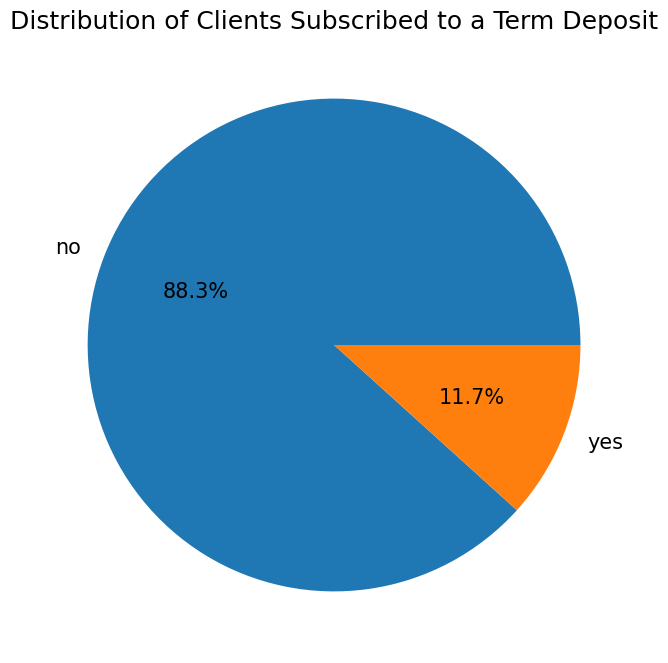

In [58]:
y_df = df1['y'].value_counts().reset_index().sort_values(by='count', ascending=False)
plt.figure(figsize=(12, 8))
plt.pie(y_df['count'],labels=y_df['y'], autopct='%1.1f%%')
plt.title('Distribution of Clients Subscribed to a Term Deposit')
plt.show()

## Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?
**`Overall Conclusion (in short):`**

- Subscriptions spike in those under 30 and over 60, but dip progressively from the 30s to the 60s.

- Students and retirees top term deposit subscriptions, while blue-collar workers and entrepreneurs lag behind.

- Singles lead in term deposit subscriptions, followed by divorced clients, with married clients trailing at the bottom.

- Individuals with higher levels of education, particularly those with tertiary education, show a higher tendency to subscribe to term deposits, as opposed to those with primary education.

- Clients without a credit default have a higher likelihood of subscribing to a term deposit compared to those who have defaulted.

- Clients with higher average account balances are more likely to subscribe to a term deposit.

- Clients without a housing loan have a higher likelihood of subscribing to a term deposit compared to those who have one.

- Clients without a personal loan have a higher likelihood of subscribing to a term deposit compared to those who have one.

- Clients contacted thorough cellular phone may have a higher chance of subscribing to term deposit.

- Clients contacted in March may prefer to subscribe to term deposits, maybe due to start of a new financial year in April (in case of India).

- Longer calls may be associated with a higher likelihood of achieving a positive outcome i.e. subscription to a term deposit.

### y vs age
**`Conclusion:`**

- There is a noticeable increase in subscriptions among the younger (<30 years) and older (>60 years) age groups

- A decline in subscription rates as age increases from the 30s to the 60s

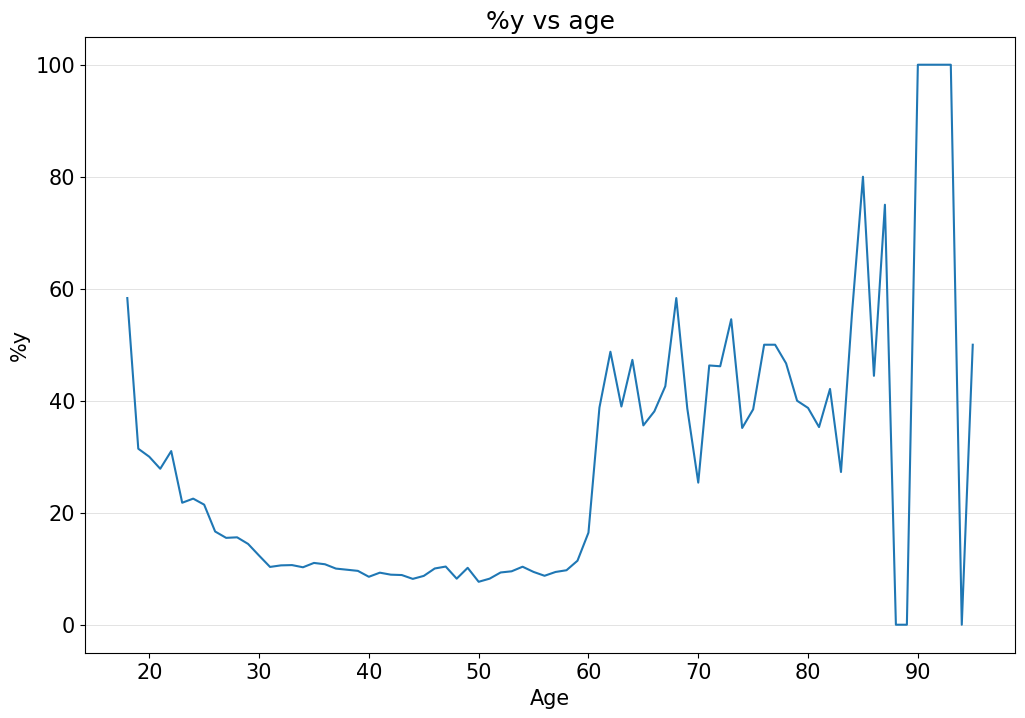

In [59]:
temp_df = df1[['age','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('age').mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.lineplot(temp_df,x='age',y='y')
plt.title('%y vs age')
plt.xlabel('Age')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs job
**`Conclusion:`**

- Students and retired clients have the highest subscription rates to term deposits

- Blue-collar and entrepreneur job categories show lower subscription rates

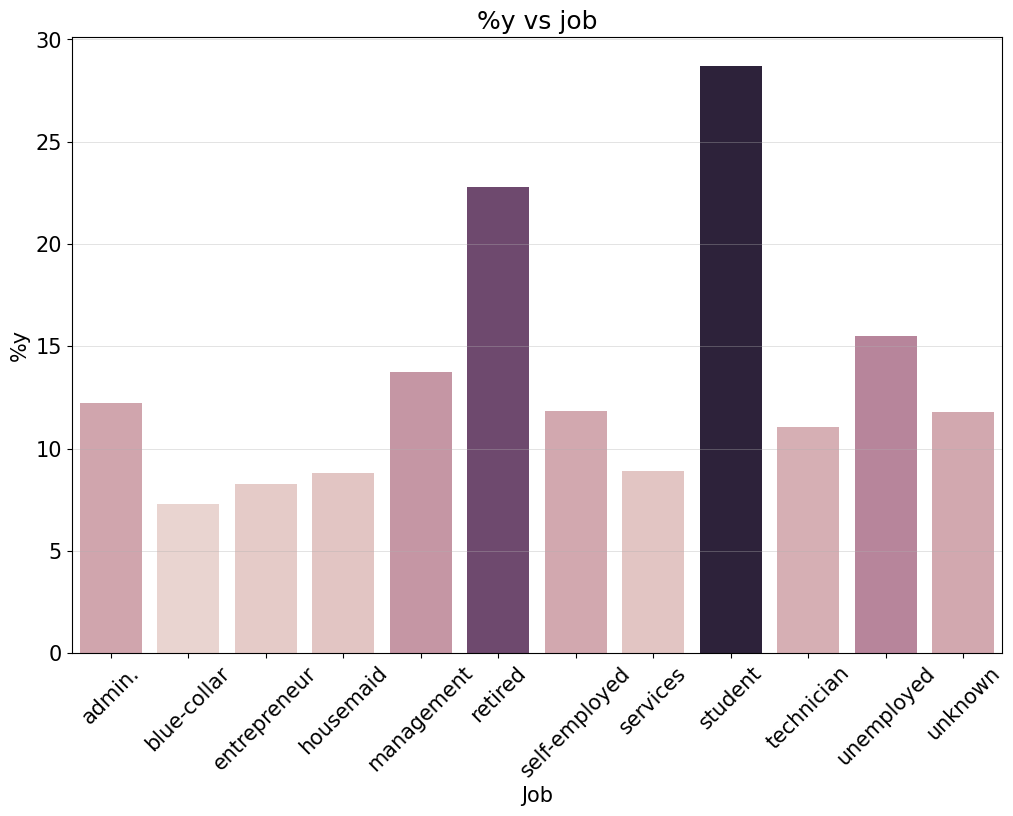

In [60]:
temp_df = df1[['job','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('job',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='job',y='y',hue='y',legend=False)
plt.title('%y vs job')
plt.xlabel('Job')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.show()

### y vs marital
**`Conclusion:`**

- Singles have the highest likelihood of subscribing to a term deposit

- Divorced clients have a slightly lower likelihood than singles, but higher than married client

- Married clients have the lowest subscription rate to term deposits among the three categories

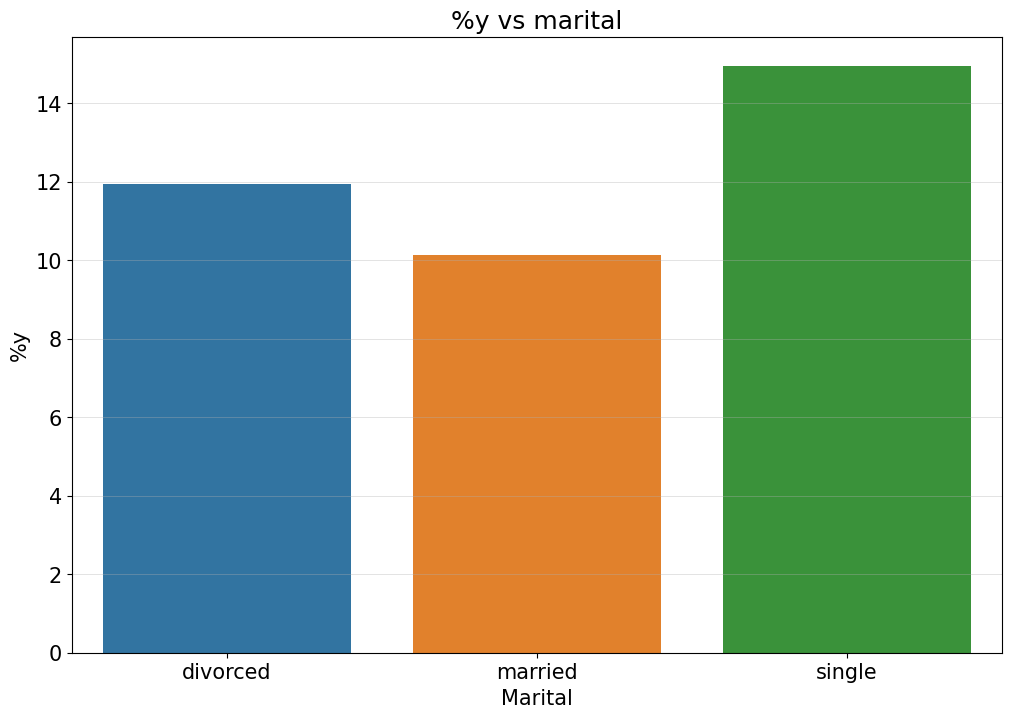

In [61]:
temp_df = df1[['marital','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('marital',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='marital',y='y',hue="marital")
plt.title('%y vs marital')
plt.xlabel('Marital')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs education
**`Conclusion:`**

- Individuals with higher levels of education, particularly those with tertiary education, show a higher tendency to subscribe to term deposits, as opposed to those with primary education

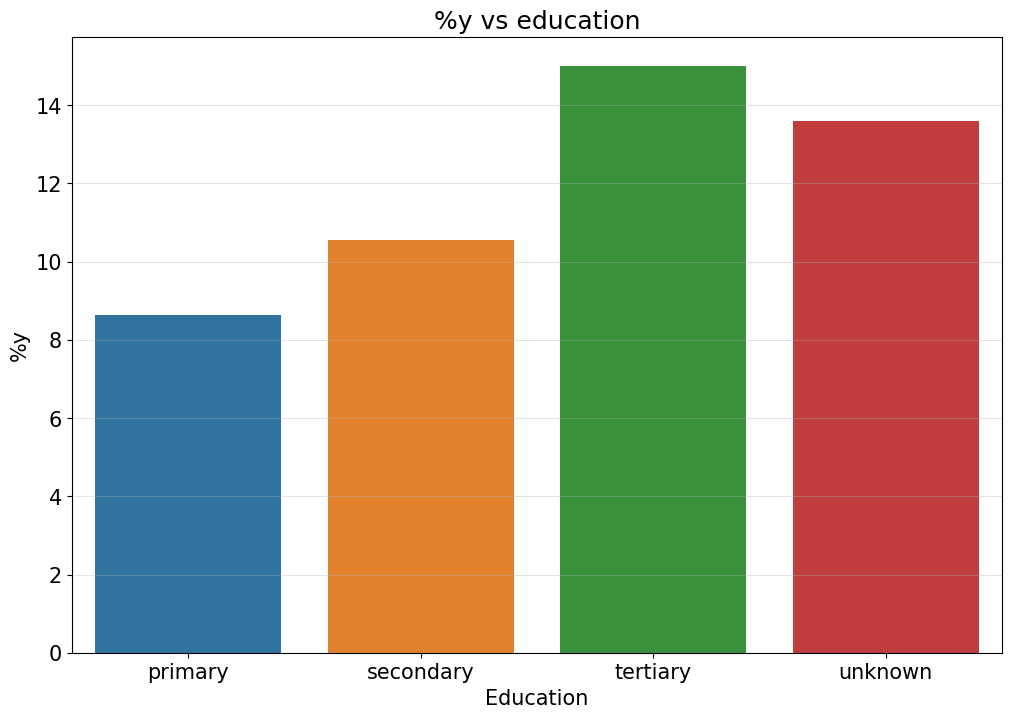

In [62]:
temp_df = df1[['education','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('education',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='education',y='y',hue='education')
plt.title('%y vs education')
plt.xlabel('Education')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs default
**`Conclusion:`**

- Clients without a credit default have a higher likelihood of subscribing to a term deposit compared to those who have defaulted

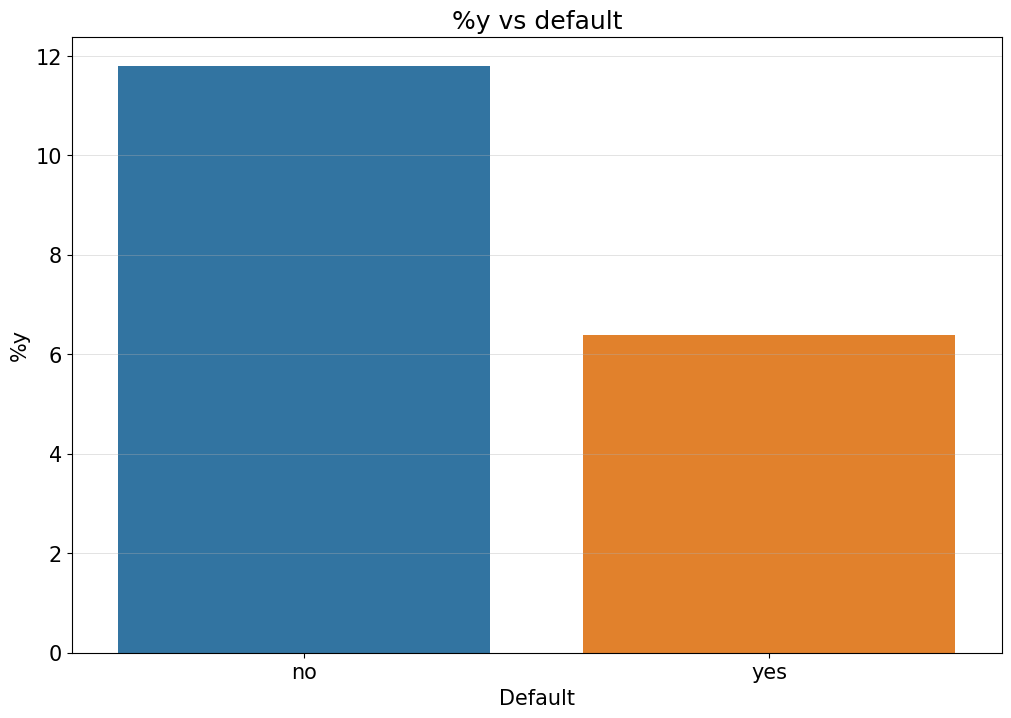

In [63]:
temp_df = df1[['default','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('default',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='default',y='y',hue='default')
plt.title('%y vs default')
plt.xlabel('Default')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs balance
**`Conclusion:`**

- Clients with higher average account balances are more likely to subscribe to a term deposit

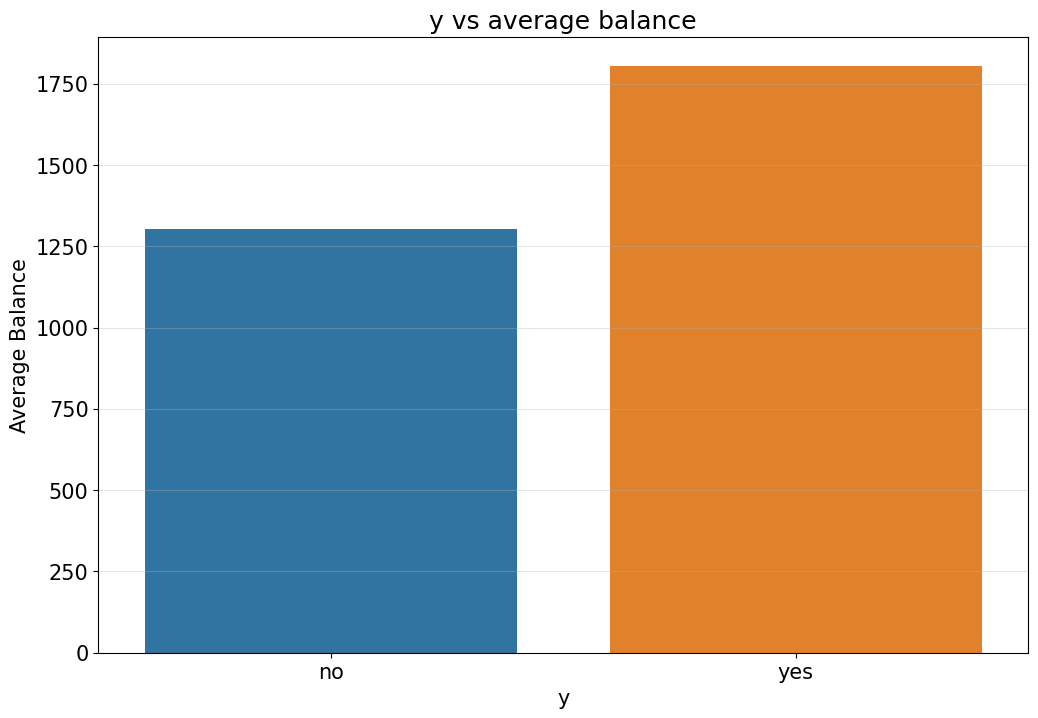

In [64]:
temp_df = df1[['balance','y']]
temp_df = temp_df.groupby('y',observed=True).mean().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='y',y='balance',hue='y')
plt.title('y vs average balance')
plt.ylabel('Average Balance')
plt.xlabel('y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs housing
**`Conclusion:`**

- Clients without a housing loan have a higher likelihood of subscribing to a term deposit compared to those who have one

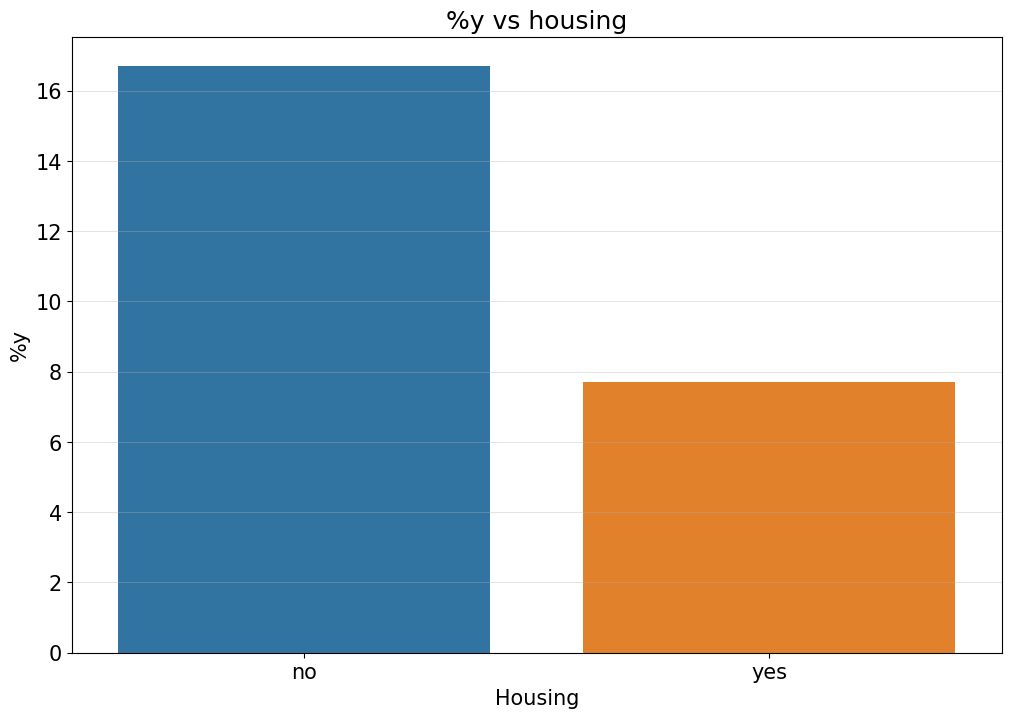

In [65]:
temp_df = df1[['housing','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('housing',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='housing',y='y',hue='housing')
plt.title('%y vs housing')
plt.xlabel('Housing')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs loan
**`Conclusion:`**

- Clients without a personal loan have a higher likelihood of subscribing to a term deposit compared to those who have one

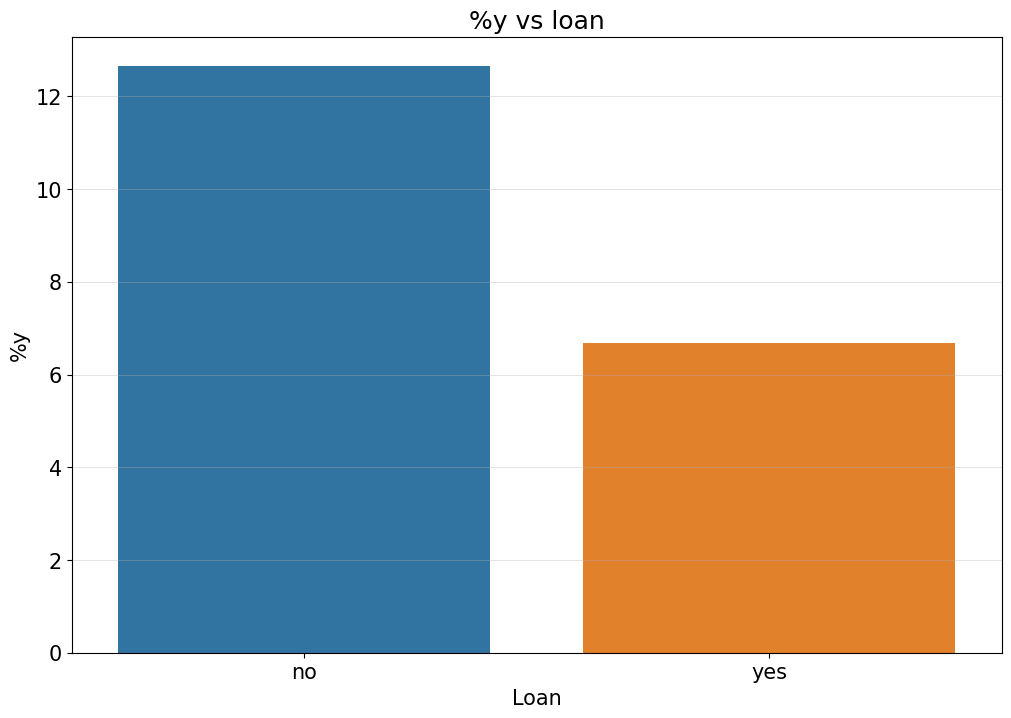

In [66]:
temp_df = df1[['loan','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('loan',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='loan',y='y',hue='loan')
plt.title('%y vs loan')
plt.xlabel('Loan')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs contact
**`Conclusion:`**

- Clients contacted thorough cellular phone may have a higher chance of subscribing to term deposit

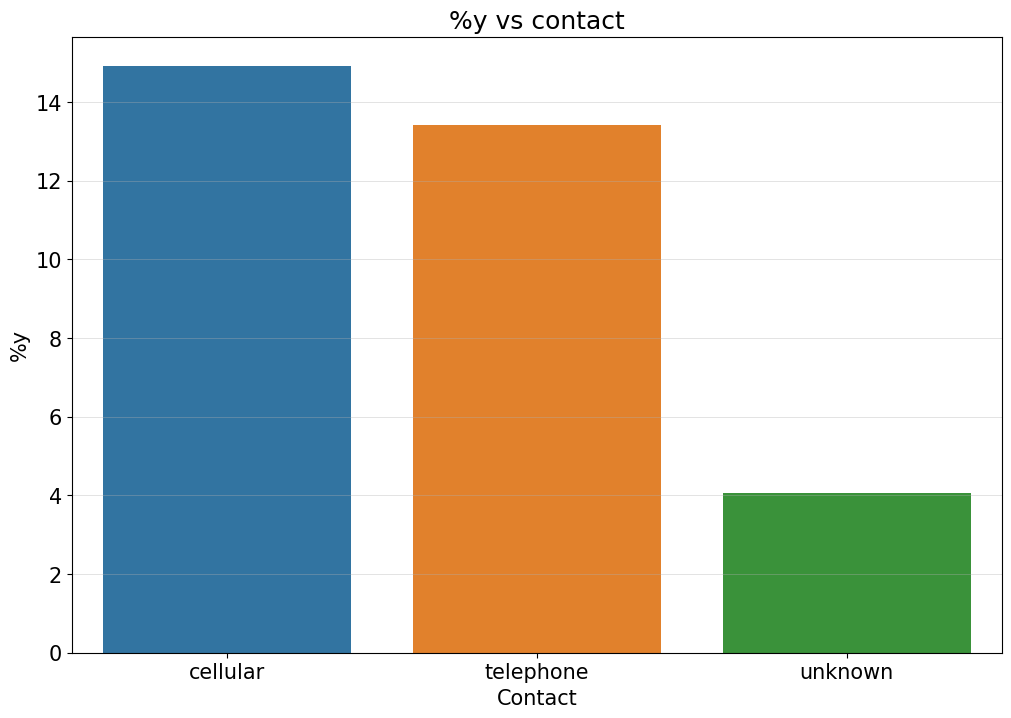

In [67]:
temp_df = df1[['contact','y']]
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby('contact',observed=True).mean().reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='contact',y='y',hue='contact')
plt.title('%y vs contact')
plt.xlabel('Contact')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()

### y vs date
**`Conclusion:`**

- Clients contacted in March may prefer to subscribe to term deposits, maybe due to start of a new financial year in April

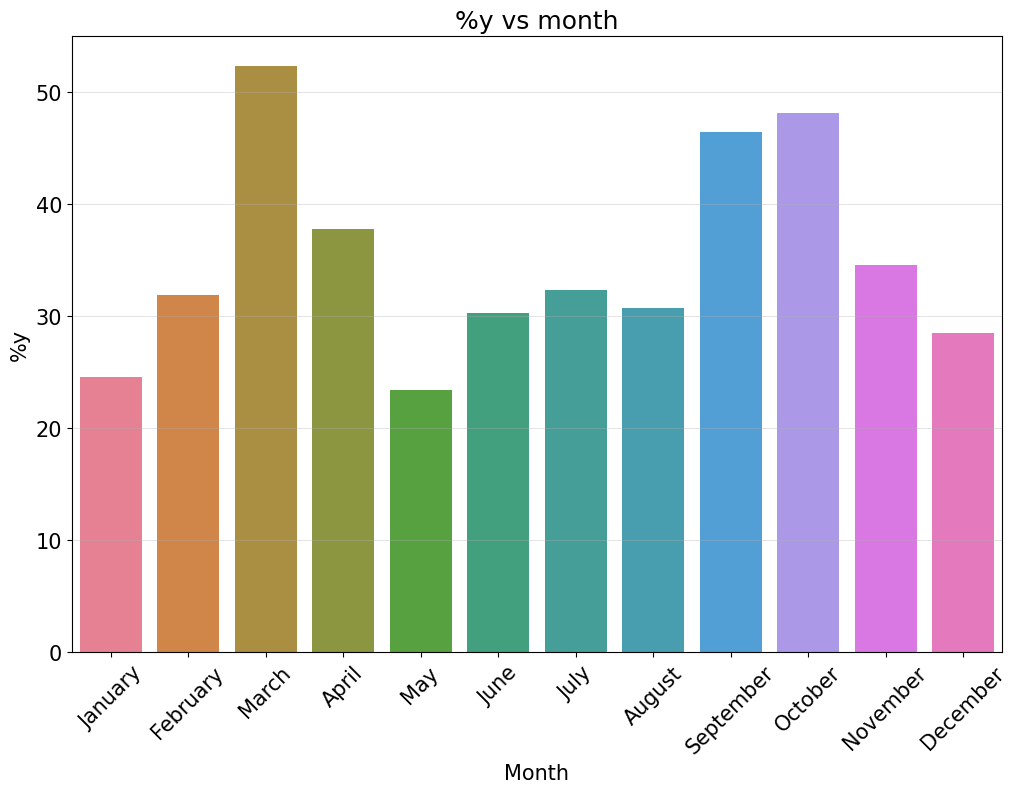

In [68]:
temp_df = df1[['date','y']]
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp_df.loc[:,'y'] = temp_df.loc[:,'y'].apply(lambda x: 1 if x == 'yes' else 0).astype(float)
temp_df = temp_df.groupby(pd.Grouper(key='date', freq='ME'),observed=True).mean().reset_index()
temp_df = temp_df.groupby(temp_df['date'].dt.month_name()).mean().reindex(order,axis=0).drop(columns='date').reset_index()
temp_df['y'] = temp_df['y']*100
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='date',y='y',hue='date')
plt.title('%y vs month')
plt.xlabel('Month')
plt.ylabel('%y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.show()

### y vs duration
**`Conclusion:`**

- Longer calls may be associated with a higher likelihood of achieving a positive outcome i.e. subscription to a term deposit

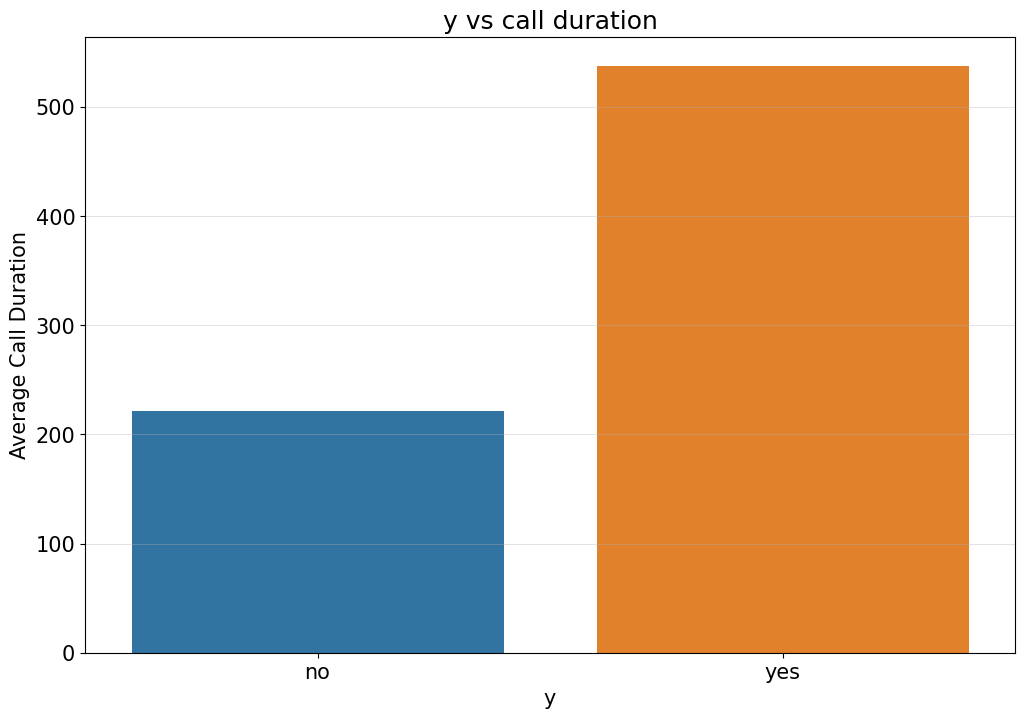

In [69]:
temp_df = df1[['duration','y']]
temp_df = temp_df.groupby('y',observed=True).mean().reset_index()
plt.figure(figsize=(12,8))
sns.barplot(temp_df,x='y',y='duration',hue='y')
plt.title('y vs call duration')
plt.ylabel('Average Call Duration')
plt.xlabel('y')
plt.grid(axis='y', linewidth=0.5, alpha=0.5)
plt.show()